In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('network_backup_dataset.csv',header=0)

In [26]:
day_no_to_key = {}

i=0
for d in data.values:  
    key = str(d[0])+","+str(d[1])
    if key not in day_no_to_key.keys():
        day_no_to_key[key]=i
        i = i+1

print(day_no_to_key)

{'1,Monday': 0, '1,Tuesday': 1, '1,Wednesday': 2, '1,Thursday': 3, '1,Friday': 4, '1,Saturday': 5, '1,Sunday': 6, '2,Monday': 7, '2,Tuesday': 8, '2,Wednesday': 9, '2,Thursday': 10, '2,Friday': 11, '2,Saturday': 12, '2,Sunday': 13, '3,Monday': 14, '3,Tuesday': 15, '3,Wednesday': 16, '3,Thursday': 17, '3,Friday': 18, '3,Saturday': 19, '3,Sunday': 20, '4,Monday': 21, '4,Tuesday': 22, '4,Wednesday': 23, '4,Thursday': 24, '4,Friday': 25, '4,Saturday': 26, '4,Sunday': 27, '5,Monday': 28, '5,Tuesday': 29, '5,Wednesday': 30, '5,Thursday': 31, '5,Friday': 32, '5,Saturday': 33, '5,Sunday': 34, '6,Monday': 35, '6,Tuesday': 36, '6,Wednesday': 37, '6,Thursday': 38, '6,Friday': 39, '6,Saturday': 40, '6,Sunday': 41, '7,Monday': 42, '7,Tuesday': 43, '7,Wednesday': 44, '7,Thursday': 45, '7,Friday': 46, '7,Saturday': 47, '7,Sunday': 48, '8,Monday': 49, '8,Tuesday': 50, '8,Wednesday': 51, '8,Thursday': 52, '8,Friday': 53, '8,Saturday': 54, '8,Sunday': 55, '9,Monday': 56, '9,Tuesday': 57, '9,Wednesday': 5

In [30]:
day_to_backup_size = {}

for d in data.values:
    key = str(d[0])+","+str(d[1])
    backup_size = d[5]
    if key not in day_to_backup_size.keys():
        day_to_backup_size[key]=0
    day_to_backup_size[key]+=backup_size

{'1,Monday': 16.662441452895028, '1,Tuesday': 8.012317076193304, '1,Wednesday': 7.3083169467783105, '1,Thursday': 10.421160912067915, '1,Friday': 9.876059211110848, '1,Saturday': 11.19774241947995, '1,Sunday': 11.15899306254798, '2,Monday': 17.601461134807803, '2,Tuesday': 8.248708133767488, '2,Wednesday': 7.256121282480543, '2,Thursday': 9.771171966011066, '2,Friday': 9.736093338220172, '2,Saturday': 11.467187840608108, '2,Sunday': 11.360356762244328, '3,Monday': 17.693142724124897, '3,Tuesday': 8.158120933085673, '3,Wednesday': 7.277152721304925, '3,Thursday': 10.144059987657949, '3,Friday': 9.951252173718043, '3,Saturday': 11.60460650794339, '3,Sunday': 11.189280107093431, '4,Monday': 17.46840525570713, '4,Tuesday': 7.91887562187176, '4,Wednesday': 7.265389409667876, '4,Thursday': 9.594929539737004, '4,Friday': 9.966533813601128, '4,Saturday': 11.660739445662443, '4,Sunday': 11.273448268675791, '5,Monday': 17.703871302047702, '5,Tuesday': 8.038423317548776, '5,Wednesday': 7.40484995

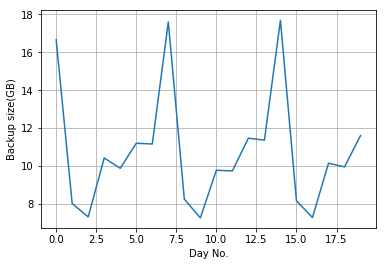

In [42]:
import matplotlib.pyplot as plt

twenty_days = [i for i in range(0,20)]
first_twenty_values = list(day_to_backup_size.values())[:20]
plt.plot(twenty_days, first_twenty_values)
plt.xlabel("Day No.")
plt.ylabel("Backup size(GB)")
plt.grid()
plt.show()

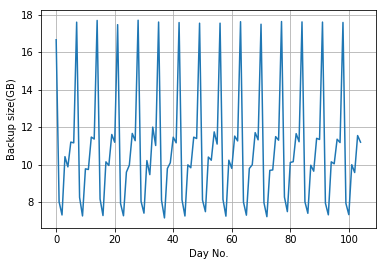

In [41]:
import matplotlib.pyplot as plt

twenty_days = [i for i in range(0,105)]
first_twenty_values = list(day_to_backup_size.values())[:105]
plt.plot(twenty_days, first_twenty_values)
plt.xlabel("Day No.")
plt.ylabel("Backup size(GB)")
plt.grid()
plt.show()